In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
nRowsRead = None
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/training.csv', delimiter=',', nrows = nRowsRead)

Mounted at /content/drive


In [ ]:
df.head()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mastitis
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mastitis
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mastitis
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,mastitis
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,mastitis


In [ ]:
# df=pd.read_csv("training.csv")

In [ ]:
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)

In [ ]:
df.tail()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
2039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
2040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
2041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12
2042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [ ]:
#List of the all symptoms is listed here in list sym.

sym=['anorexia','abdominal_pain','anaemia','abortions','acetone','aggression','arthrogyposis',
    'ankylosis','anxiety','bellowing','blood_loss','blood_poisoning','blisters','colic','Condemnation_of_livers',
    'coughing','depression','discomfort','dyspnea','dysentery','diarrhoea','dehydration','drooling',
    'dull','decreased_fertility','diffculty_breath','emaciation','encephalitis','fever','facial_paralysis','frothing_of_mouth',
    'frothing','gaseous_stomach','highly_diarrhoea','high_pulse_rate','high_temp','high_proportion','hyperaemia','hydrocephalus',
    'isolation_from_herd','infertility','intermittent_fever','jaundice','ketosis','loss_of_appetite','lameness',
    'lack_of-coordination','lethargy','lacrimation','milk_flakes','milk_watery','milk_clots',
    'mild_diarrhoea','moaning','mucosal_lesions','milk_fever','nausea','nasel_discharges','oedema',
    'pain','painful_tongue','pneumonia','photo_sensitization','quivering_lips','reduction_milk_vields','rapid_breathing',
    'rumenstasis','reduced_rumination','reduced_fertility','reduced_fat','reduces_feed_intake','raised_breathing','stomach_pain',
    'salivation','stillbirths','shallow_breathing','swollen_pharyngeal','swelling','saliva','swollen_tongue',
    'tachycardia','torticollis','udder_swelling','udder_heat','udder_hardeness','udder_redness','udder_pain','unwillingness_to_move',
    'ulcers','vomiting','weight_loss','weakness']

#List of Diseases (26 Cattle Diseases Mention) is listed in list disease.

disease=['mastitis','blackleg','bloat','coccidiosis','cryptosporidiosis',
        'displaced_abomasum','gut_worms','listeriosis','liver_fluke','necrotic_enteritis','peri_weaning_diarrhoea',
        ' rift_valley_fever','rumen_acidosis',
        'traumatic_reticulitis','calf_diphtheria','foot_rot','foot_and_mouth','ragwort_poisoning','wooden_tongue','infectious_bovine_rhinotracheitis',
'acetonaemia','fatty_liver_syndrome','calf_pneumonia','schmallen_berg_virus','trypanosomosis','fog_fever']

## graphs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Fix integer division
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


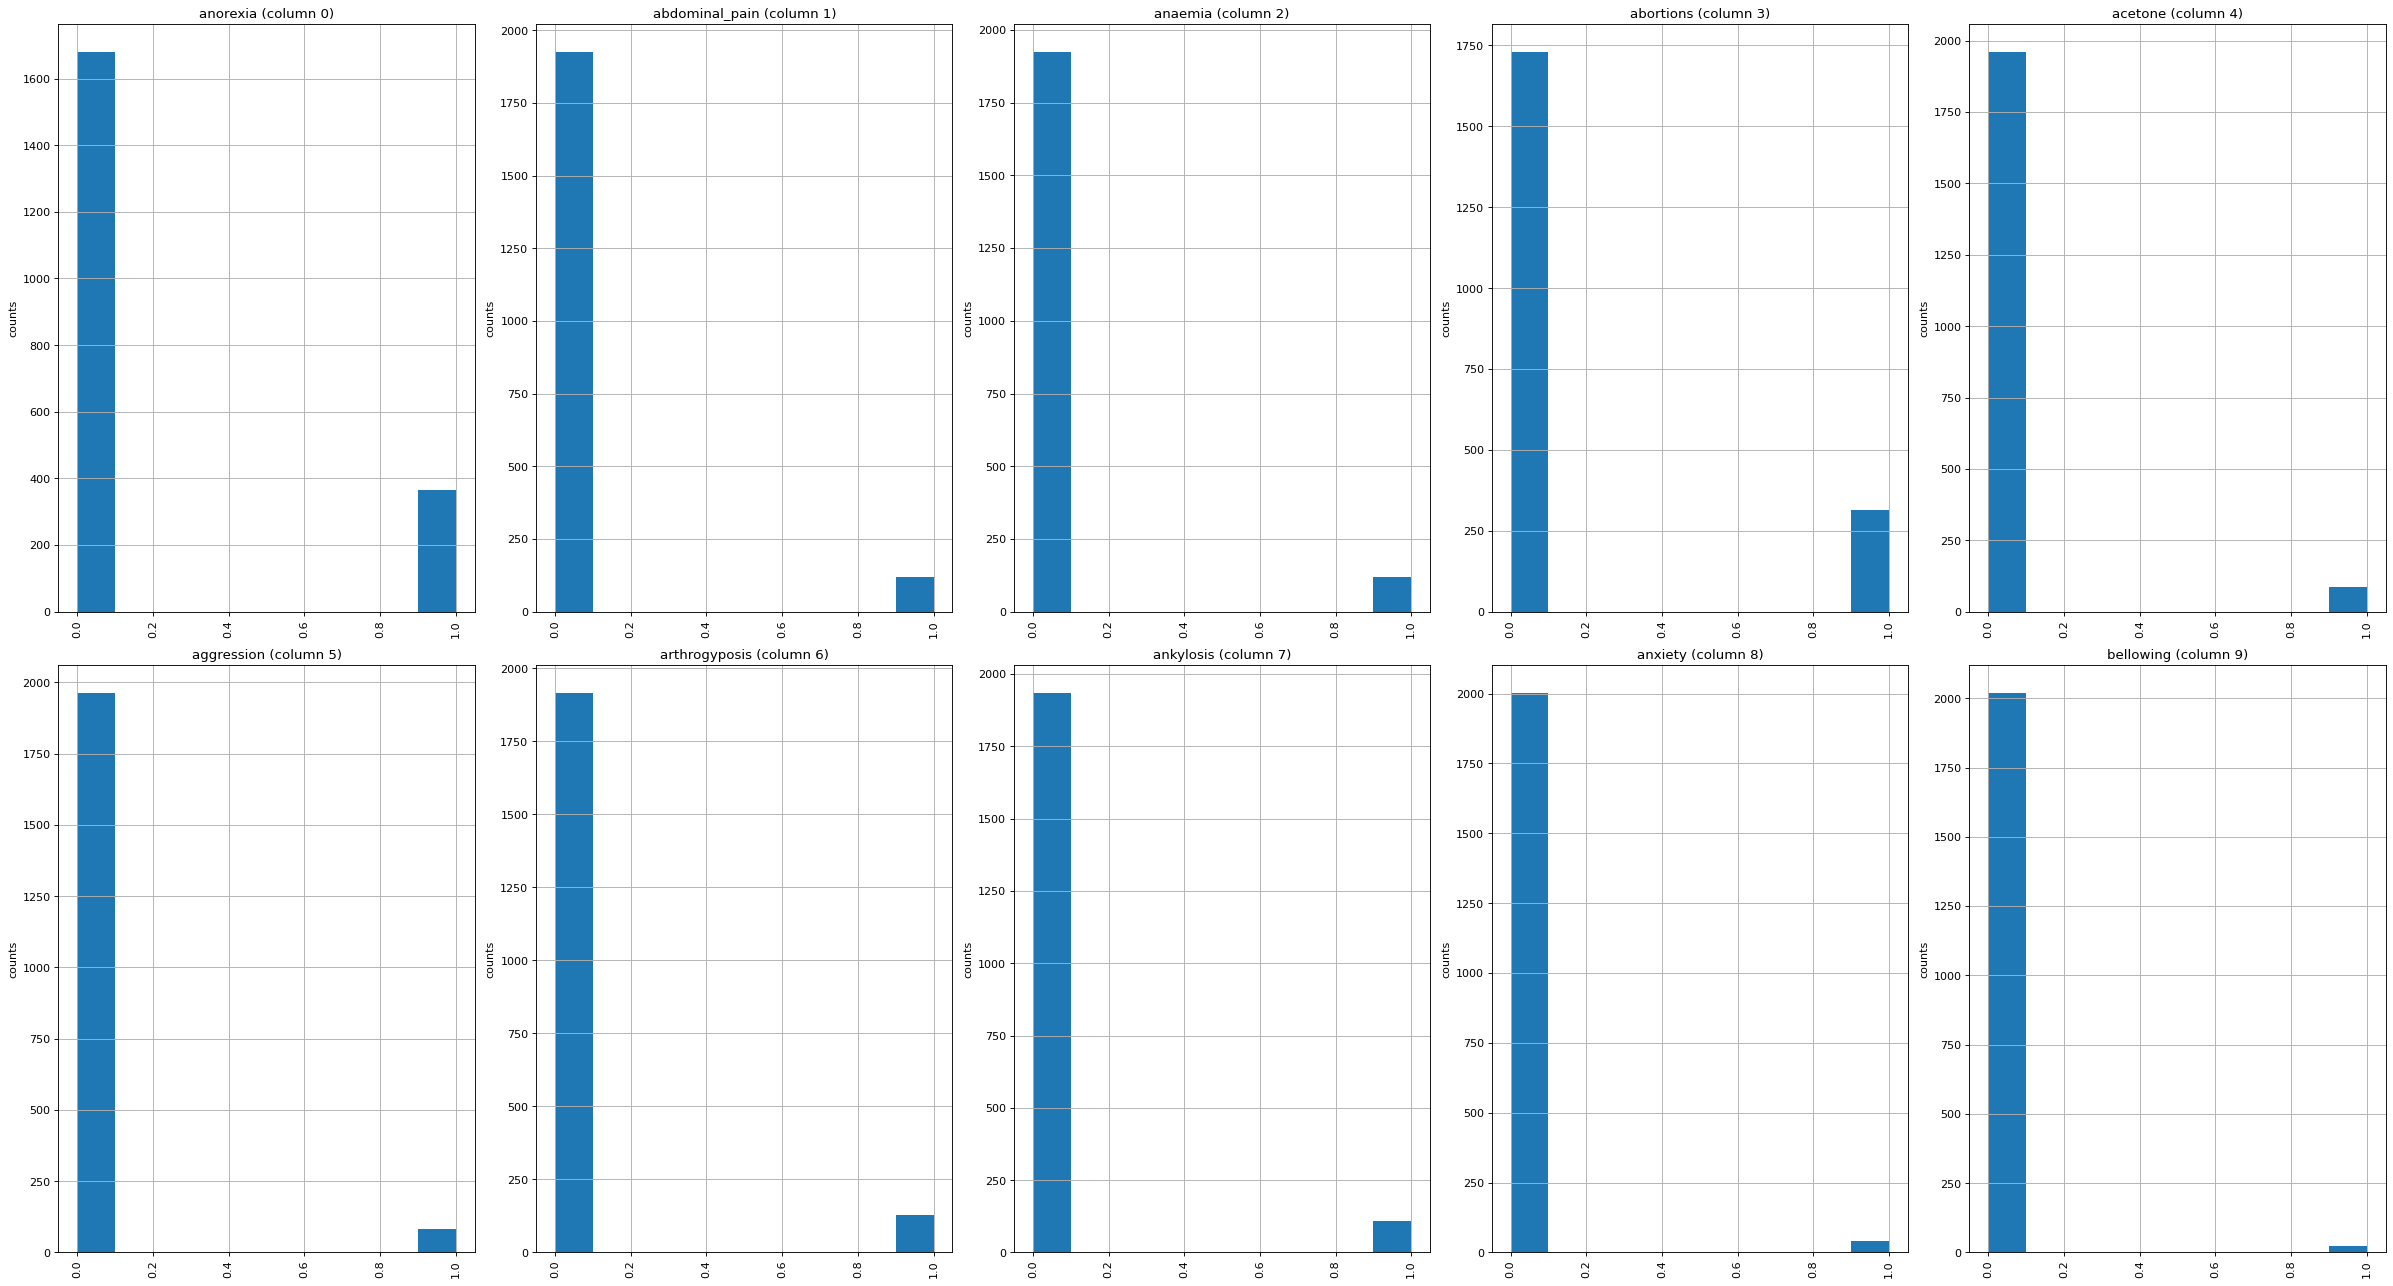

In [ ]:
plotPerColumnDistribution(df, 10, 5)

In [ ]:
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna(axis='columns')
    df1 = df1[[col for col in df1 if df1[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df1)  # Fix: use df1 instead of df
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center',
                          va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

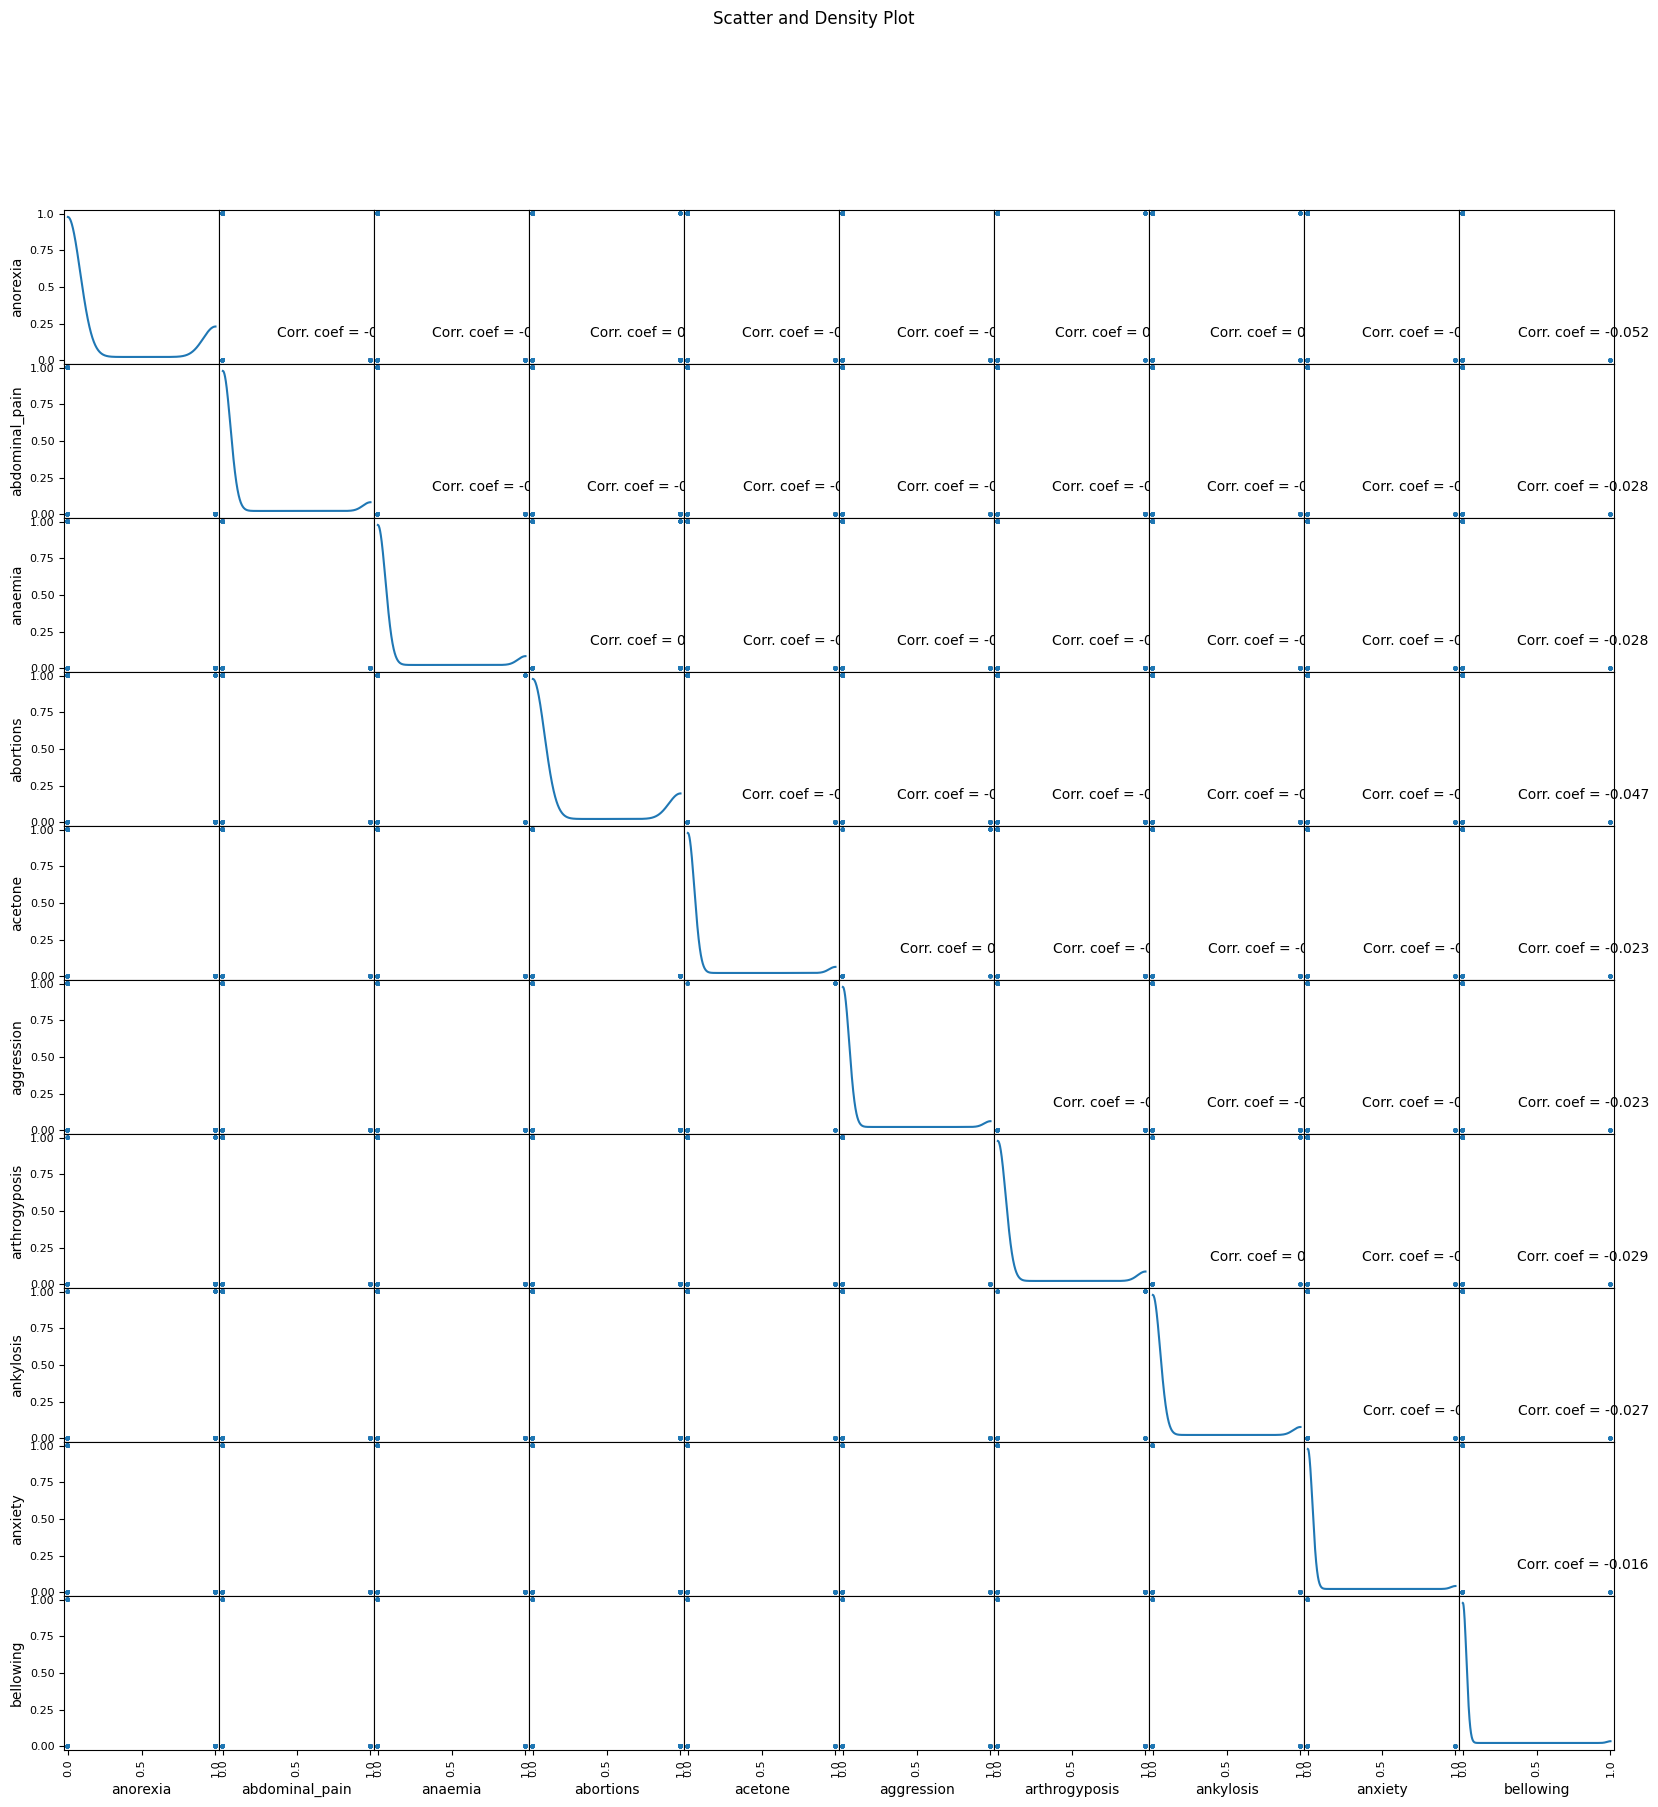

In [ ]:
plotScatterMatrix(df, 20, 10)

In [ ]:
X = df[sym]
y = df["prognosis"]
np.ravel(y)


array([ 0,  0,  0, ..., 12, 12, 13])

In [ ]:
tr=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/testing.csv', delimiter=',', nrows = nRowsRead)

#Replace in pandas for replacing the values

tr.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
tr.head()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4


In [ ]:
X_test= tr[sym]
y_test = tr[["prognosis"]]
np.ravel(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
print(X_test)

    anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0          0               0        0          0        0           0   
1          1               0        0          0        0           0   
2          0               0        0          0        0           0   
3          0               0        0          0        0           0   
4          0               0        0          0        0           0   
5          0               0        0          0        0           0   
6          0               1        0          0        0           0   
7          0               0        0          1        0           0   
8          0               0        1          0        0           0   
9          0               0        0          0        0           0   
10         0               0        0          0        0           0   
11         1               0        0          1        0           0   
12         0               0        0          0   

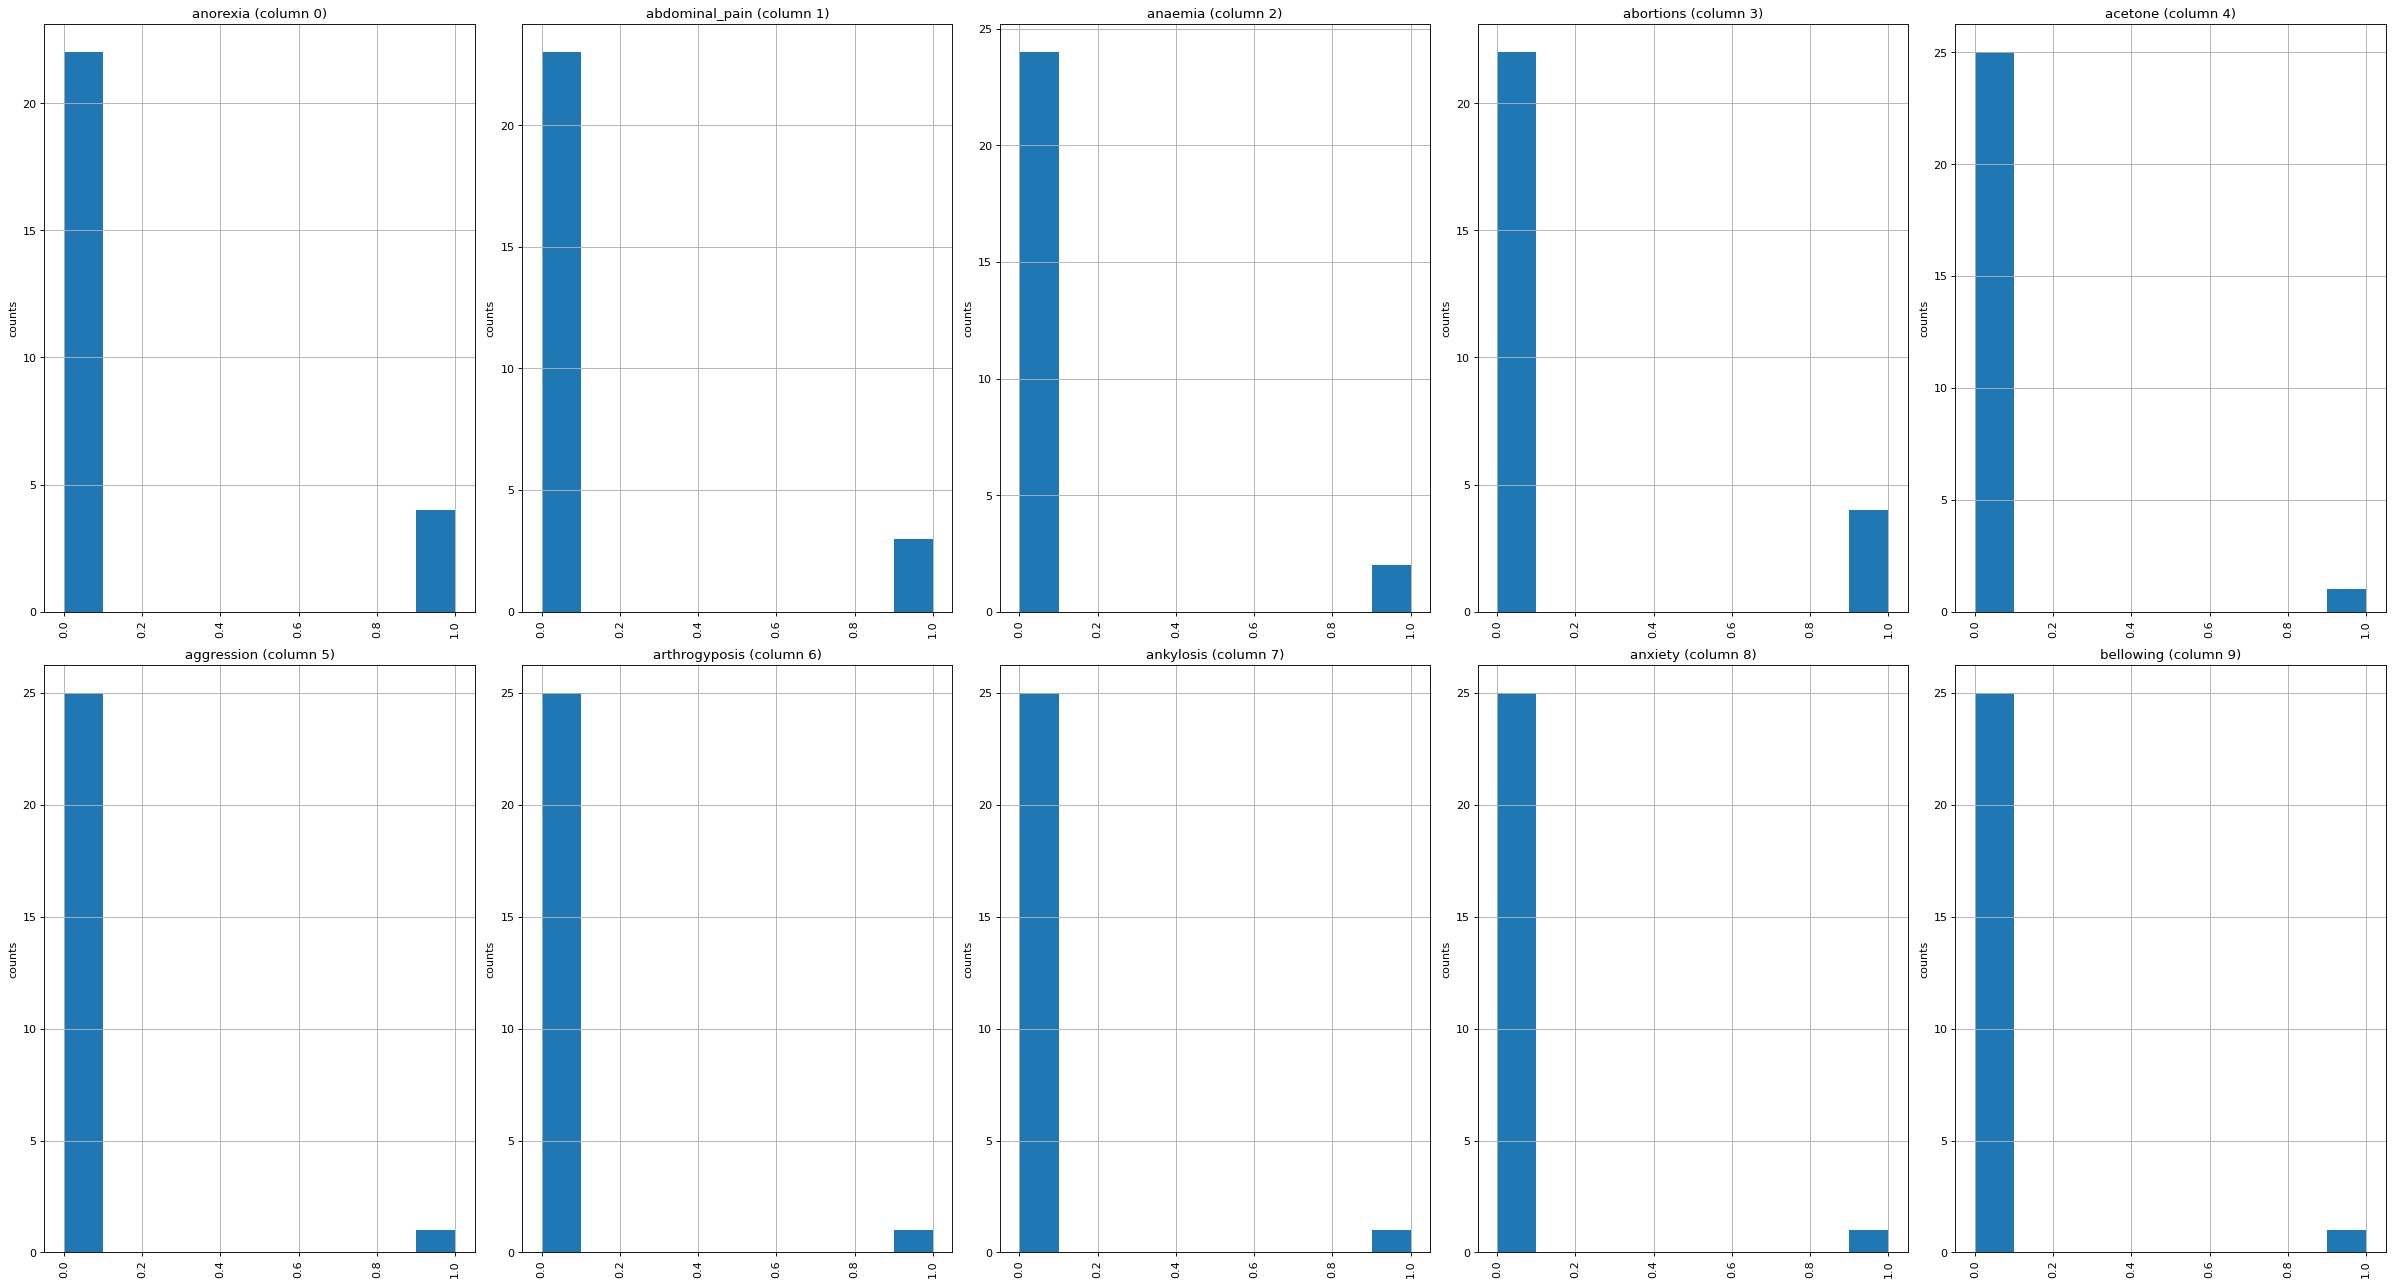

In [ ]:
plotPerColumnDistribution(tr, 10, 5)

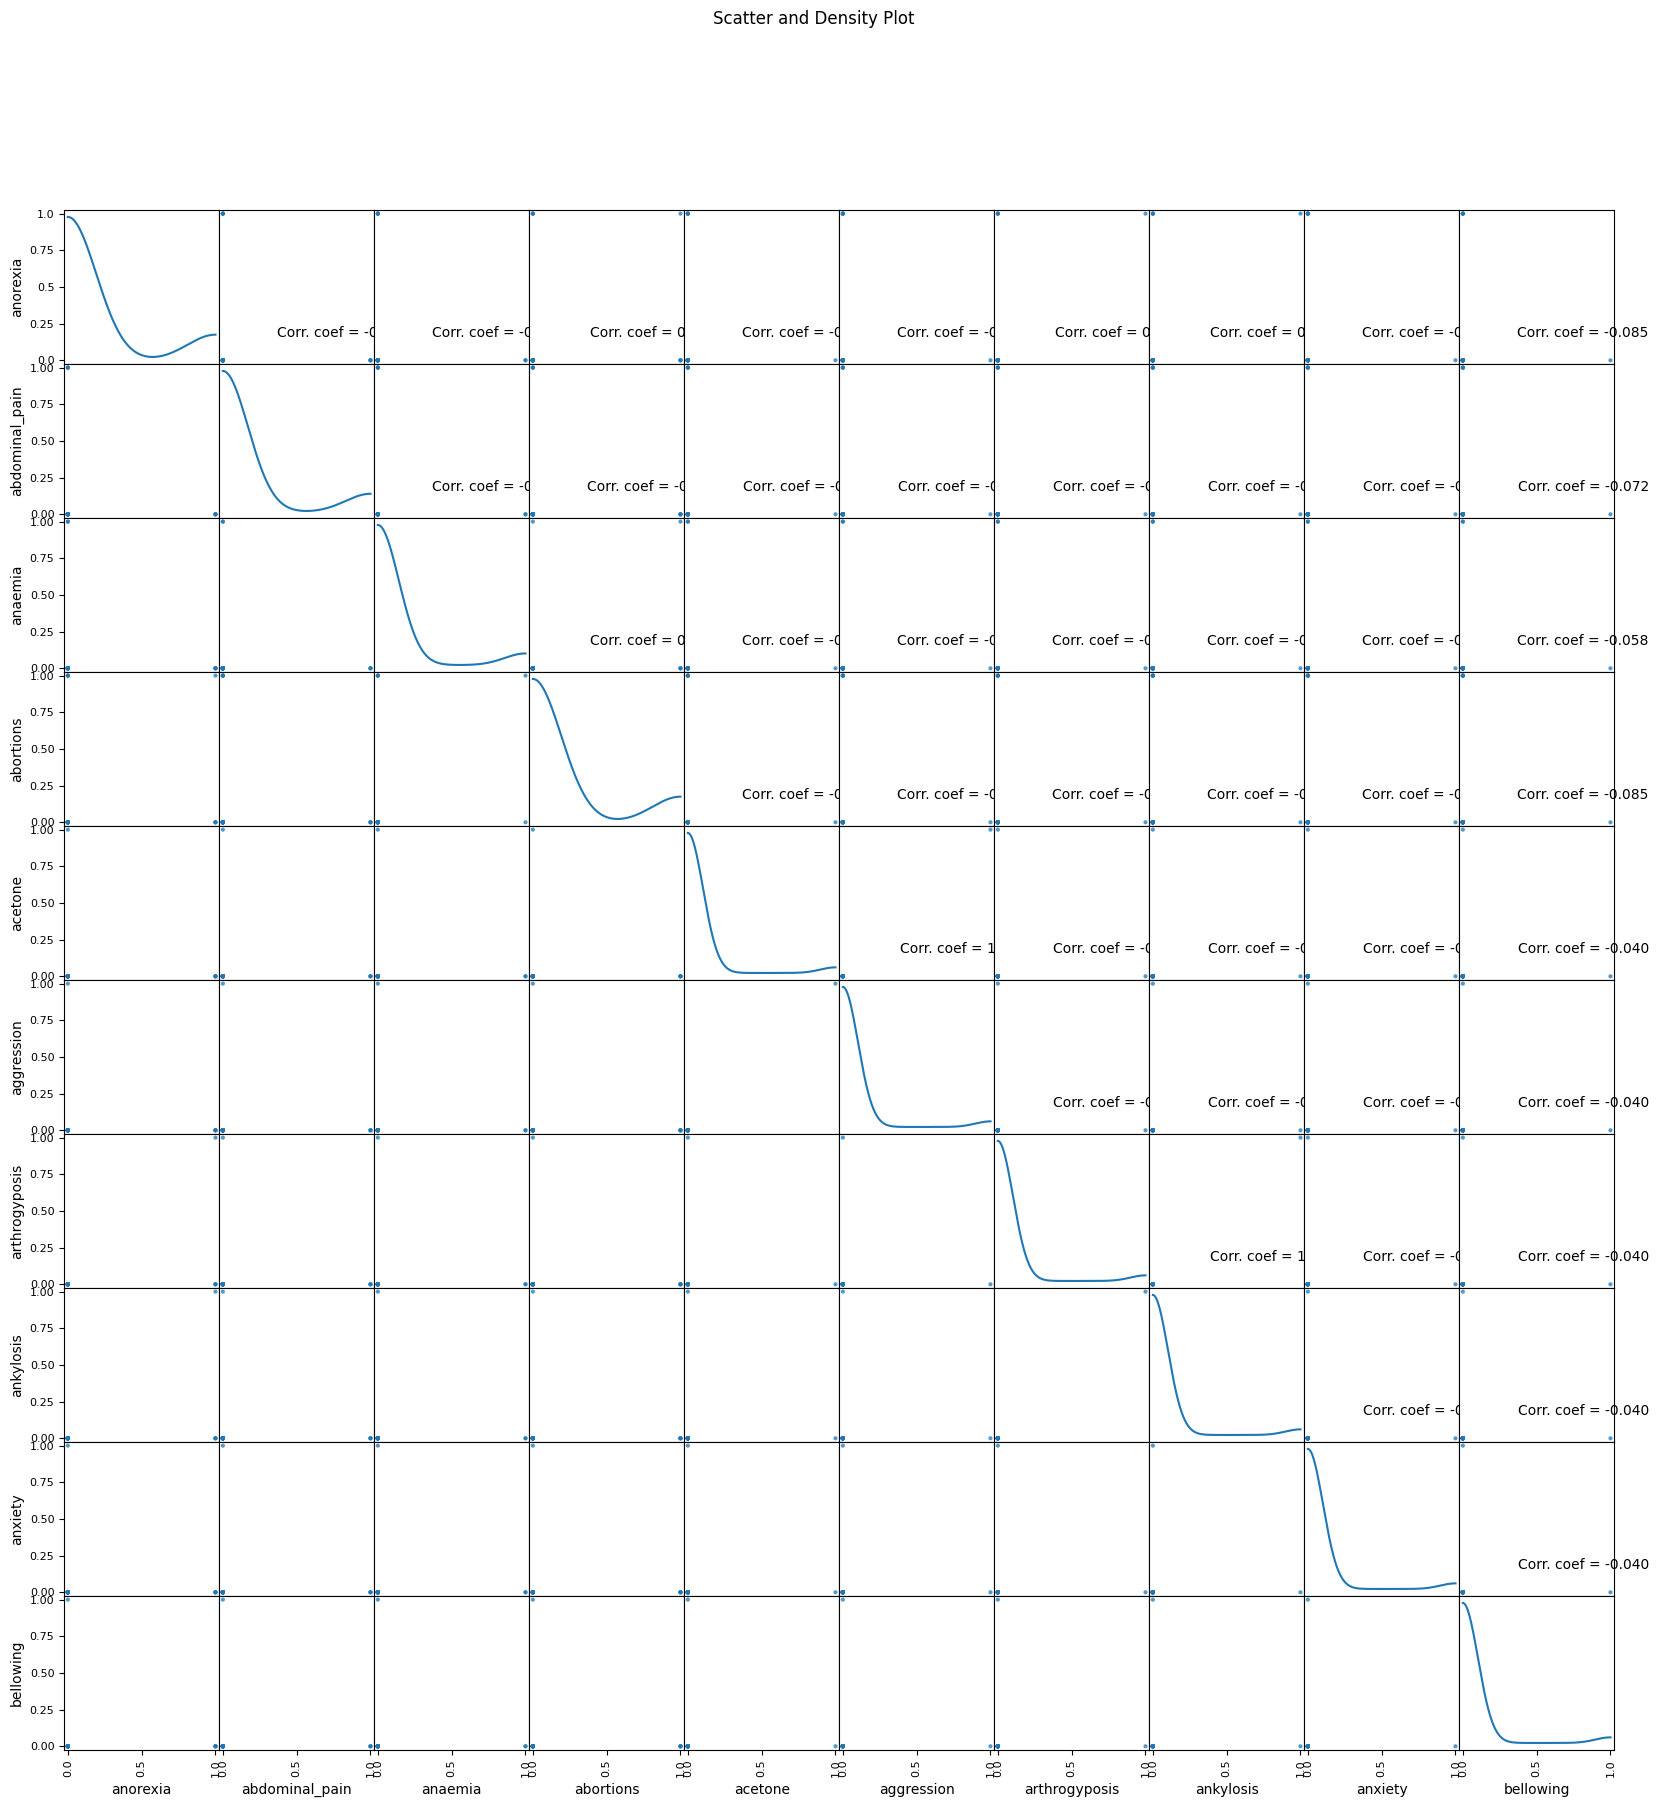

In [ ]:
plotScatterMatrix(tr, 20, 10)

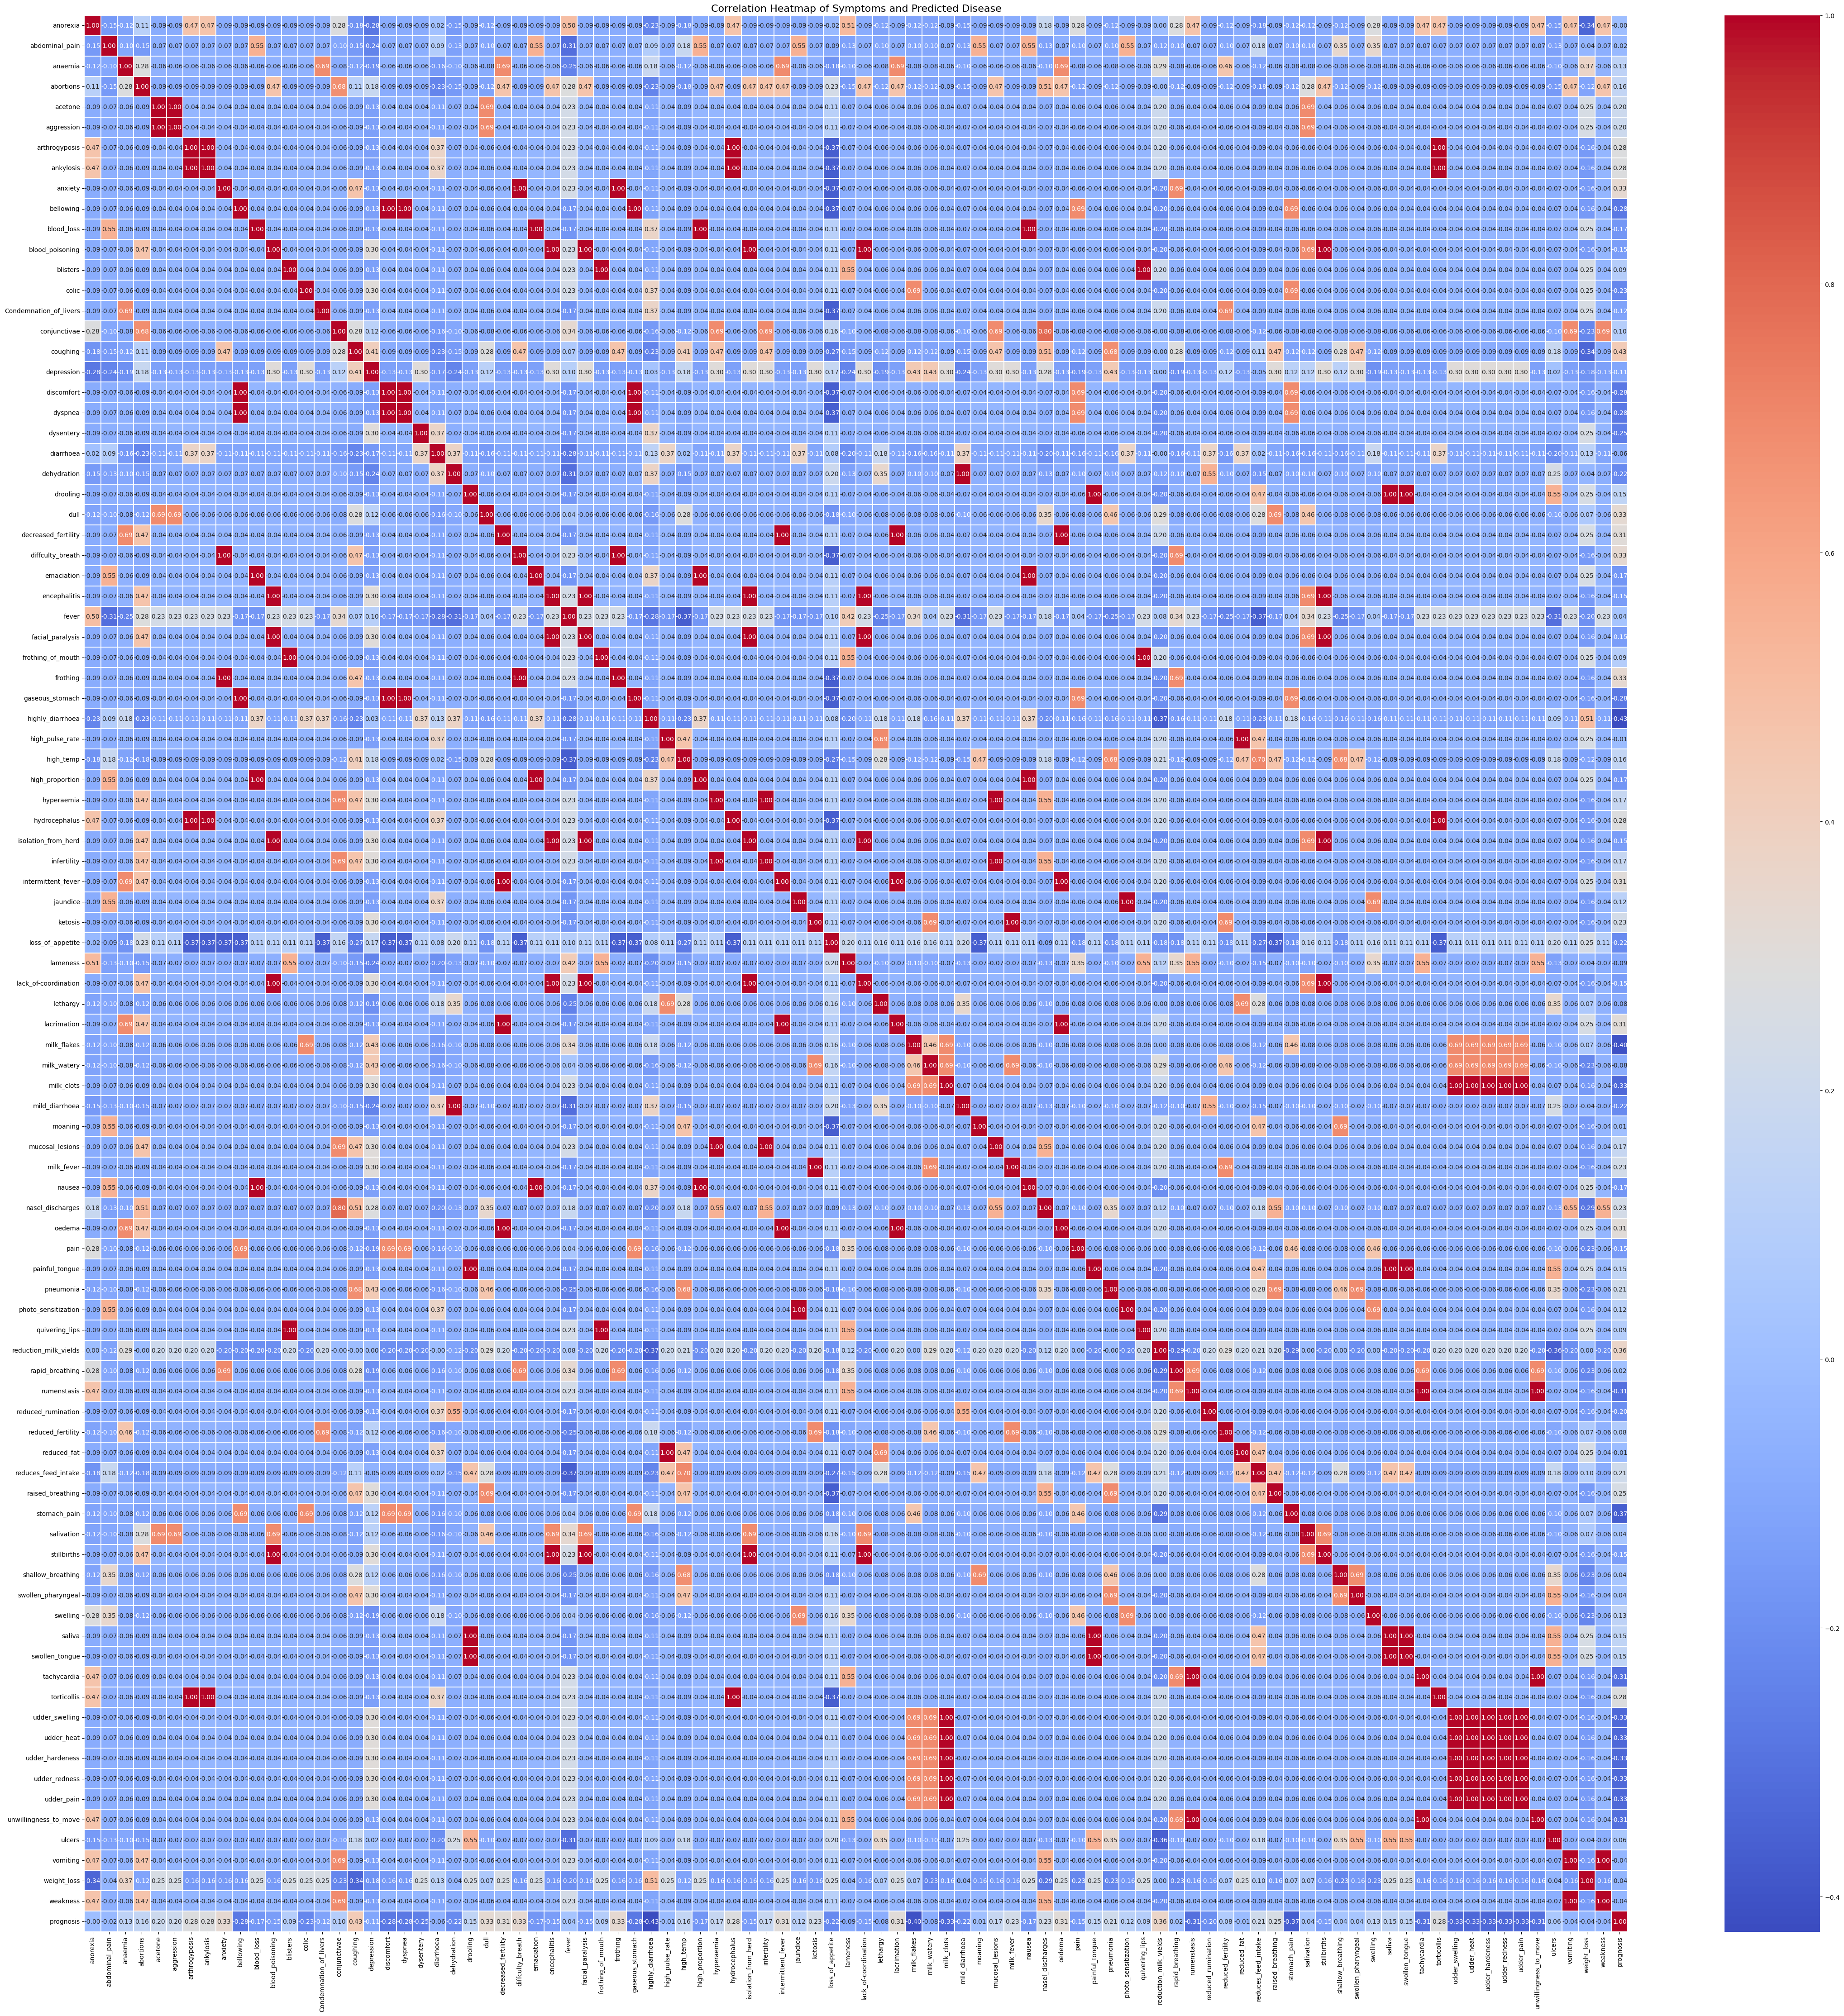

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = tr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(55, 55))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Symptoms and Predicted Disease', fontsize=16)

# Show the plot
plt.show()

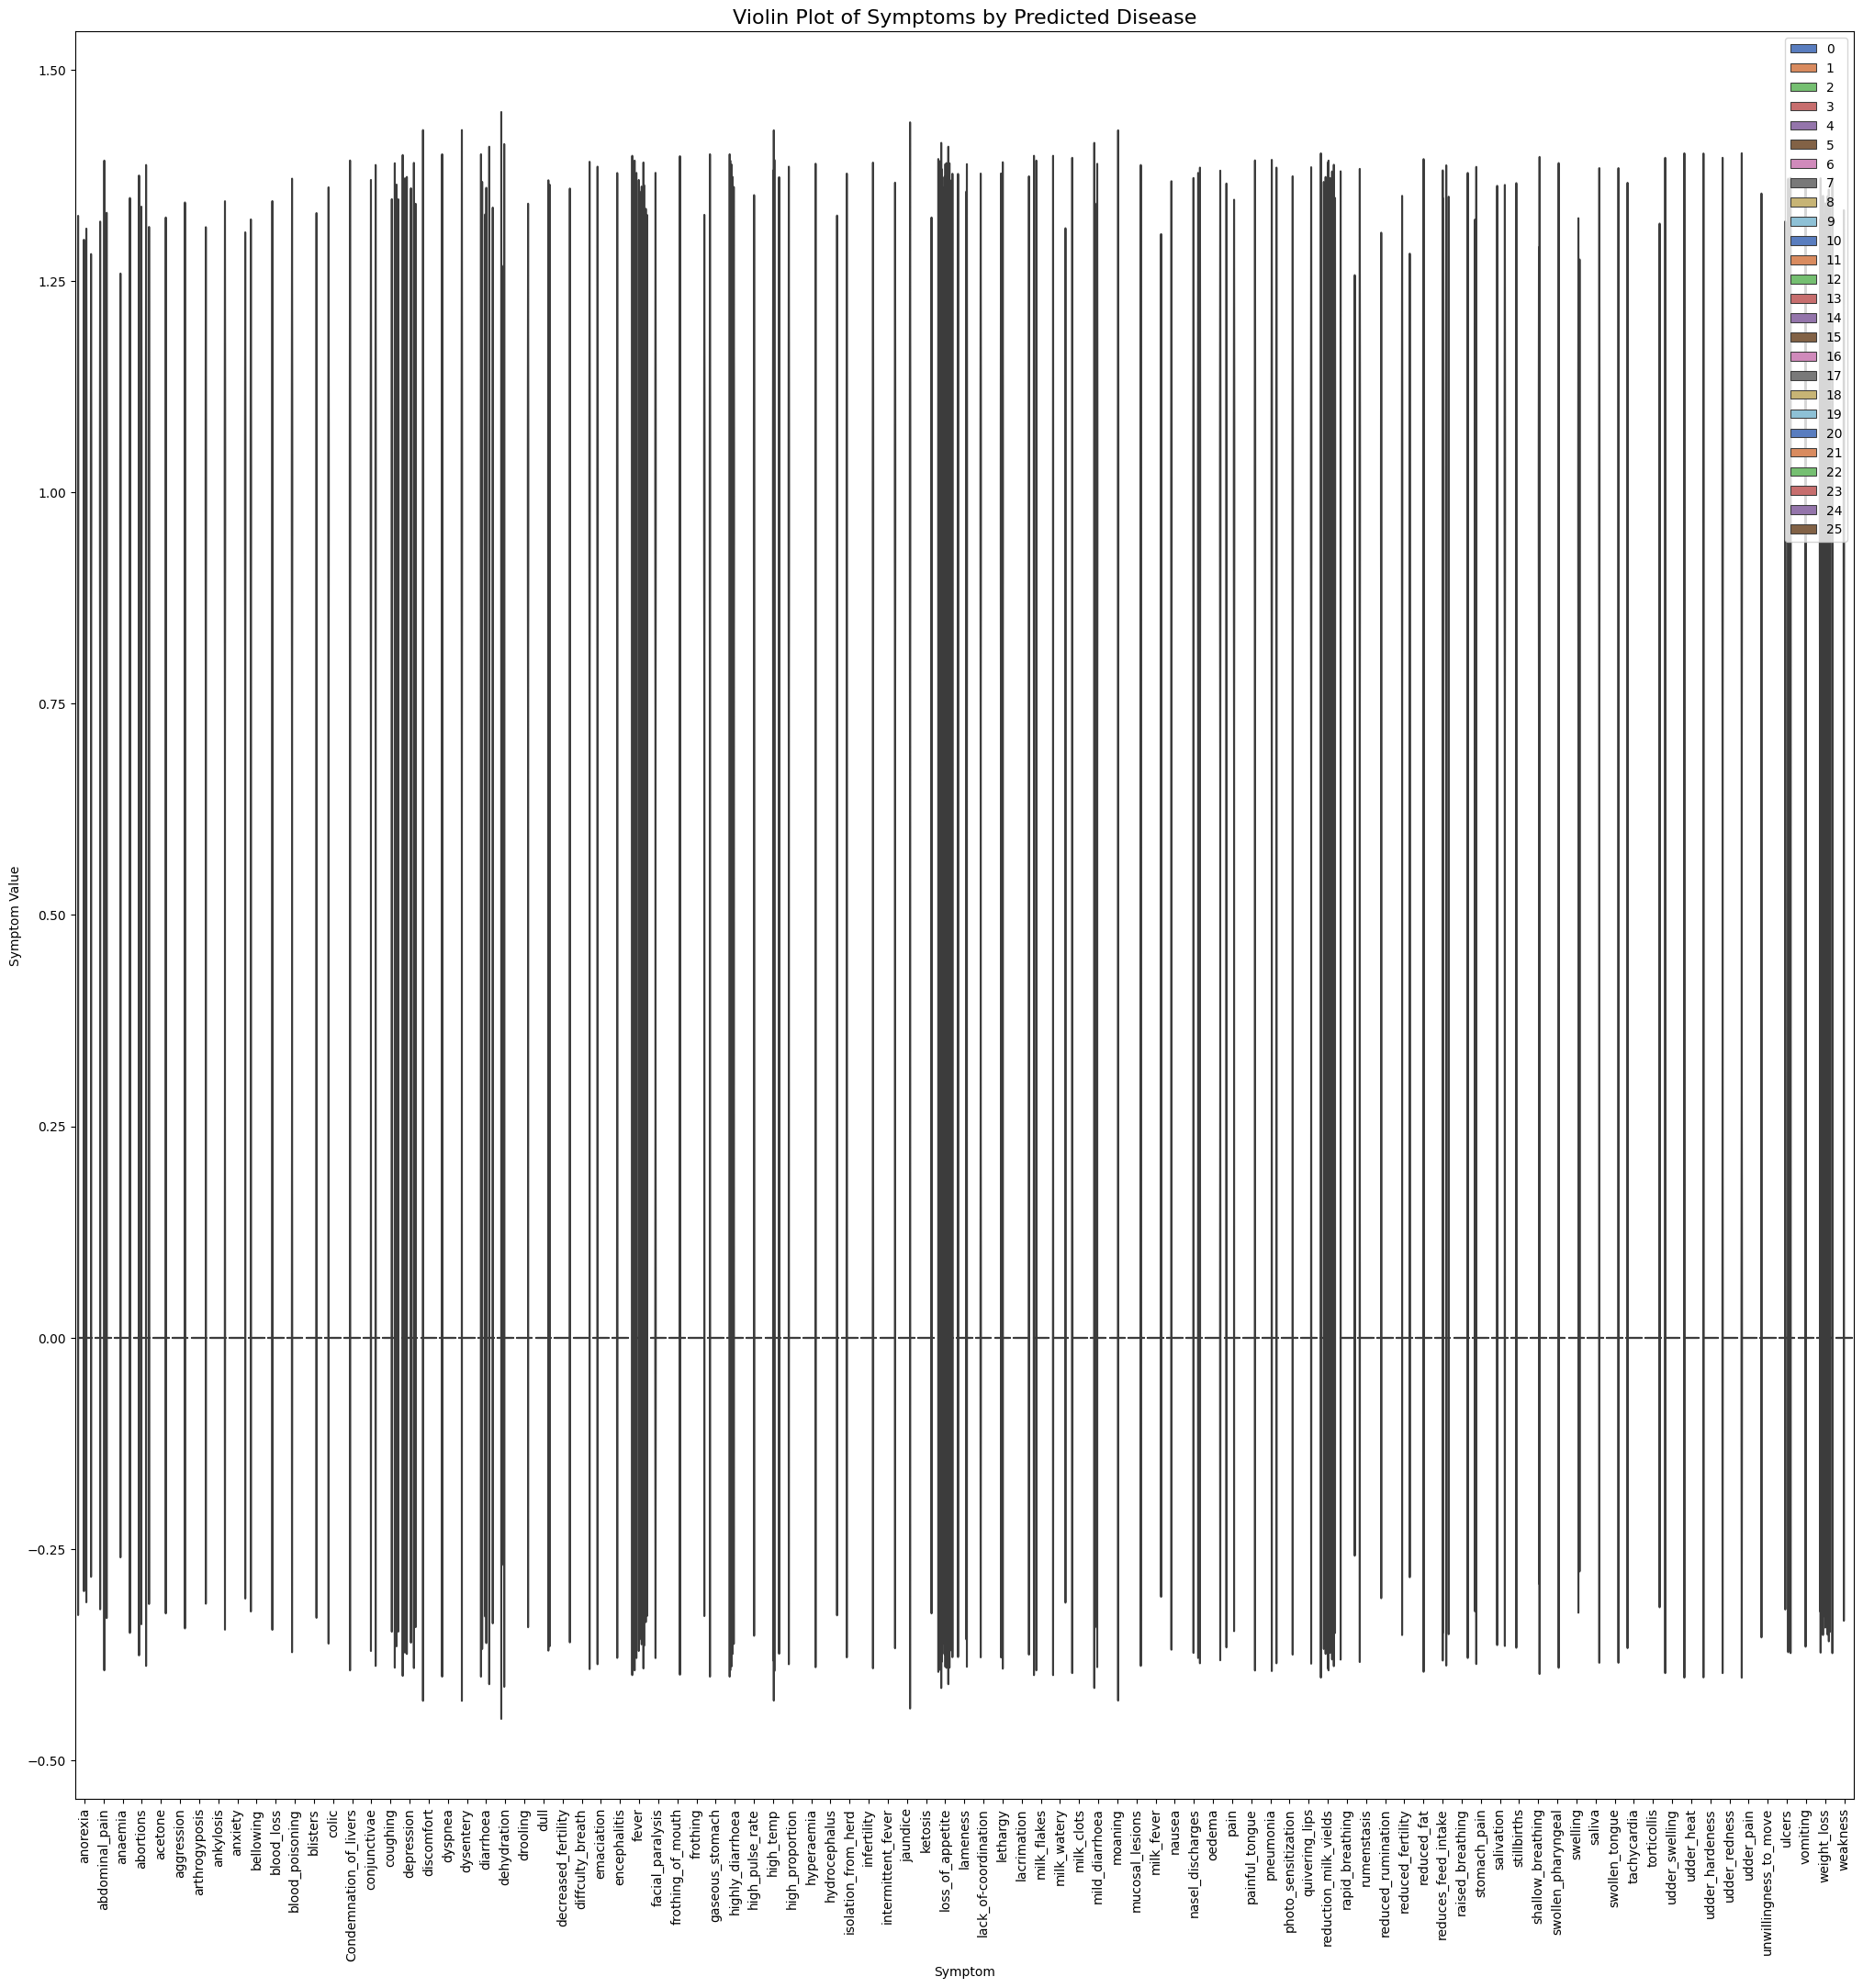

In [ ]:
# Melt the DataFrame to long format for creating violin plots
df_melted = pd.melt(df, id_vars='prognosis', var_name='Symptom', value_name='Symptom Value')

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Create a violin plot using Seaborn
sns.violinplot(x='Symptom', y='Symptom Value', hue='prognosis', data=df_melted, split=False, inner='quart', palette='muted')

ax = plt.gca()
# Rotate x-axis labels by 90 degrees
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title of the plot
plt.title('Violin Plot of Symptoms by Predicted Disease', fontsize=16)

# Set the location of the legend explicitly
plt.legend(loc='upper right')

# Show the plot
plt.show()

## Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X, y)

# Make predictions on the test set
y_pred = dt.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)
# Calculate the cross-validation score
cv_scores = cross_val_score(dt, X, y, cv=10)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)
print("Performance score:", rf_score)

F1 score: 1.0
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Performance score: 1.0


In [ ]:

psymptoms = ['anorexia']#,'dyspnea','jaundice','hyperaemia','ketosis']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)             # sanitaising
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
predict = dt.predict(inputtest)
dt_predicted=predict[0]
# print(predict)
# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(dt_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


traumatic_reticulitis


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(l2)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X, y)

# Make predictions on the test set
y_pred = rf.predict(X_test)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)
# Calculate the cross-validation score
cv_scores = cross_val_score(dt, X, y, cv=10)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)
print("Performance score:", rf_score)

F1 score: 1.0
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Performance score: 1.0


In [ ]:
psymptoms = ['anorexia','dyspnea','jaundice','hyperaemia','ketosis']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)             # sanitaising
# print(l2)
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
predict = rf.predict(inputtest)
rf_predicted=predict[0]
# print(predict)
# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(rf_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


fatty_liver_syndrome


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(l2)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes Algorithm
gnb = GaussianNB()

# Train the model
gnb.fit(X, y)

# Make predictions on the test set
y_pred = rf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)
# Calculate the cross-validation score
cv_scores = cross_val_score(dt, X, y, cv=10)
print("Cross-validation scores:", cv_scores)
# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)
print("Performance score:", rf_score)

F1 score: 1.0
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Performance score: 1.0


In [ ]:
psymptoms = ['anorexia','dyspnea','jaundice','hyperaemia','ketosis']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)             # sanitaising
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
predict = gnb.predict(inputtest)
gnb_predicted=predict[0]
# print(predict)
# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(gnb_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


bloat


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X, y)

# Make predictions on the test set
y_pred = knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)
# Calculate the cross-validation score
cv_scores = cross_val_score(dt, X, y, cv=10)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)
print("Performance score:", rf_score)


F1 score: 1.0
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Performance score: 1.0


In [ ]:
psymptoms = ['anorexia']#,'dyspnea','jaundice','hyperaemia','ketosis']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)             # sanitaising
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
inputtest = np.array(inputtest)
predict = knn.predict(inputtest)
knn_predicted=predict[0]

# print(predicted)
h='no'
for a in range(0,len(disease)):
    if(knn_predicted == a):
        h='yes'
        break

if (h=='yes'):
    print(disease[a])
else:
    print("Not Found")


 rift_valley_fever


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(l2)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### get the most common prediction

In [ ]:
from collections import Counter
predictions = [dt_predicted, rf_predicted, gnb_predicted, knn_predicted]
print(predictions)

# Count the occurrences of each number in predictions
prediction_counts = Counter(predictions)

# Find the most prediction and its count
recurring_number, count = prediction_counts.most_common(1)[0]

# Print the most prediction
if count > 1:
    for a in range(0,len(disease)):
        if(recurring_number == a):
            print(disease[a])
else:
    if count == 1:
        Ranf = predictions[1]
        print(disease[Ranf]) # If there is no recurring number, print the second number in predictions


[13, 21, 2, 11]
fatty_liver_syndrome


### Saving the trained model

In [ ]:
import pickle


In [ ]:
with open('decision_tree_model.sav', 'wb') as file:
    pickle.dump(dt, file)

with open('random_forest_model.sav', 'wb') as file:
    pickle.dump(rf, file)

with open('naive_bayes_model.sav', 'wb') as file:
    pickle.dump(gnb, file)

with open('knn_model.sav', 'wb') as file:
    pickle.dump(knn, file)

In [ ]:
# loading the saved models
loaded_dt = pickle.load(open('decision_tree_model.sav', 'rb'))

loaded_rf = pickle.load(open('random_forest_model.sav', 'rb'))

loaded_gnb = pickle.load(open('naive_bayes_model.sav', 'rb'))

loaded_knn = pickle.load(open('knn_model.sav', 'rb'))

In [ ]:
# prediction
psymptoms = ['anorexia','dyspnea','jaundice','hyperaemia','ketosis']

l2=[]
for i in range(0,len(sym)):
    l2.append(0)             # sanitaising
for k in range(0,len(sym)):
    for z in psymptoms:
        if(z==sym[k]):
            l2[k]=1

inputtest = [l2]
print(inputtest)
dt_predict = loaded_dt.predict(inputtest)     # decision_tree_model
loaded_dt_predicted=dt_predict[0]

rf_predict = loaded_rf.predict(inputtest)     # random_forest_model
loaded_rf_predicted=rf_predict[0]

inputtest = np.array(inputtest)

gnb_predict = loaded_gnb.predict(inputtest)   # naive_bayes_model
loaded_gnb_predicted=gnb_predict[0]

knn_predict = loaded_knn.predict(inputtest)   # knn_model
loaded_knn_predicted=knn_predict[0]


[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# comparing all the model and print common or else prediction of random forest

predictions = [loaded_dt_predicted, loaded_rf_predicted, loaded_gnb_predicted, loaded_knn_predicted]
print(predictions)

# Count the occurrences of each number in predictions
prediction_counts = Counter(predictions)

# Find the most prediction and its count
recurring_number, count = prediction_counts.most_common(1)[0]

# Print the most prediction
if count > 1:
    for a in range(0,len(disease)):
        if(recurring_number == a):
          rdisease=disease[a]
          print("Your cow is likely to have a ",disease[a])
else:
    if count == 1:
        Ranf = predictions[1]
        rdisease=disease[Ranf]
        print("Your cow is likely to have a ",disease[Ranf]) # If there is no recurring number, print the second number in predictions

[19, 21, 2, 11]
Your cow is likely to have a  fatty_liver_syndrome


### remedy recommemdation

In [ ]:
# remedy recommemdation

remedies = {
'mastitis': 'Isolate the infected cow, use appropriate antibiotics, and maintain proper hygiene during milking.',
'blackleg': 'Vaccinate cattle against blackleg, and provide prompt treatment with antibiotics if symptoms occur.',
'bloat': 'Introduce anti-bloat medications, provide access to fresh water, and ensure proper grazing management.',
'coccidiosis': 'Administer coccidiostats, maintain clean living conditions, and provide proper nutrition.',
'cryptosporidiosis': 'Implement strict hygiene practices, provide supportive care, and administer appropriate medications.',
'displaced_abomasum': 'Consult with a veterinarian for proper diagnosis and treatment, which may include surgery.',
'gut_worms': 'Administer anthelmintic medications and practice good pasture management.',
'listeriosis': 'Use antibiotics for treatment, improve hygiene, and provide proper nutrition.',
'liver_fluke': 'Implement measures to control snail intermediate hosts and use anthelmintic medications.',
'necrotic_enteritis': 'Administer antibiotics and improve overall flock management and hygiene.',
'peri_weaning_diarrhoea': 'Implement proper nutrition, hygiene, and consider antibiotic treatment.',
'rift_valley_fever': 'Vaccinate animals, practice vector control, and ensure proper hygiene.',
'rumen_acidosis': 'Adjust the diet to prevent acidosis, provide access to clean water, and use buffers.',
'traumatic_reticulitis': 'Consult with a veterinarian for proper diagnosis and treatment, which may include surgery.',
'calf_diphtheria': 'Administer antibiotics, provide supportive care, and improve living conditions.',
'foot_rot': 'Implement proper foot hygiene, provide hoof care, and use appropriate medications.',
'foot_and_mouth': 'Quarantine affected animals, practice strict biosecurity, and consider vaccination.',
'ragwort_poisoning': 'Remove ragwort plants from pastures, and provide supportive care to affected animals.',
'wooden_tongue': 'Administer antibiotics, provide soft and easily chewable feed, and improve oral hygiene.',
'infectious_bovine_rhinotracheitis': 'Vaccinate against IBR, isolate affected animals, and provide supportive care.',
'acetonaemia': 'Adjust the diet, provide proper nutrition, and consult with a veterinarian for treatment.',
'fatty_liver_syndrome': 'Improve diet and nutrition, provide proper care, and consult with a veterinarian for treatment.',
'calf_pneumonia': 'Vaccinate against respiratory pathogens, provide proper ventilation, and administer antibiotics.',
'schmallen_berg_virus': 'Vaccinate against SBV, practice vector control, and provide supportive care.',
'trypanosomosis': 'Use trypanocidal medications, control vectors, and provide supportive care.',
'fog_fever': 'Implement preventive measures, provide supportive care, and consult with a veterinarian for treatment.',
}
print(f'As a basic remedy for {rdisease} we recommend to {remedies[rdisease]}')



As a basic remedy for fatty_liver_syndrome we recommend to Improve diet and nutrition, provide proper care, and consult with a veterinarian for treatment.
